In [23]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

logspace:

In [24]:
import importlib
import summary_stats
import single_fid
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(summary_stats)
importlib.reload(single_fid)
proj = summary_stats.ProjCorr(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/', fid='L2', logging_level='INFO')
_, wp, model_err = proj.get_mean_std(r_range=[0, 100])
X = proj.get_params_array()

# We have negative values as low as -1, so we need to replace them with a small number
# since we are going to take the log10 of the data. The wp changes alot, so log is better
Y = wp
Y[Y < 0] = 1e-10
Y = np.log10(wp)


print(f'X shape: {X.shape}, Y shape: {Y.shape}, model_err shape: {model_err.shape}') 
sf = single_fid.SingleFid(X = X, Y = Y, model_err = model_err, logging_level='DEBUG')
sf.train()


11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Total snapshots: 546
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM Load IC file from all_ICs.json
11/19/2024 10:46:19 PM moved -1 steps out of 546 sims to find a non-nan median
11/19/2024 10:46:19 PM moved -1 steps o

X shape: (546, 10), Y shape: (546, 65), model_err shape: (546, 65)


In [25]:
sf.train()
print(sf.model.kernel.variance, sf.model.kernel.lengthscales)

<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=3.313189672418441> <tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([-0.35152826,  2.2434636 , -0.72145945,  0.3365319 ,  0.77722299,
        0.9118074 ,  0.96910225,  1.11549411,  1.30807586,  1.90513698])>


In [26]:
proj.params_list

['omega0',
 'omegab',
 'hubble',
 'scalar_amp',
 'ns',
 'w0_fld',
 'wa_fld',
 'N_ur',
 'alpha_s',
 'm_nu']

/tmp/ipykernel_34872/3348413483.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 30)


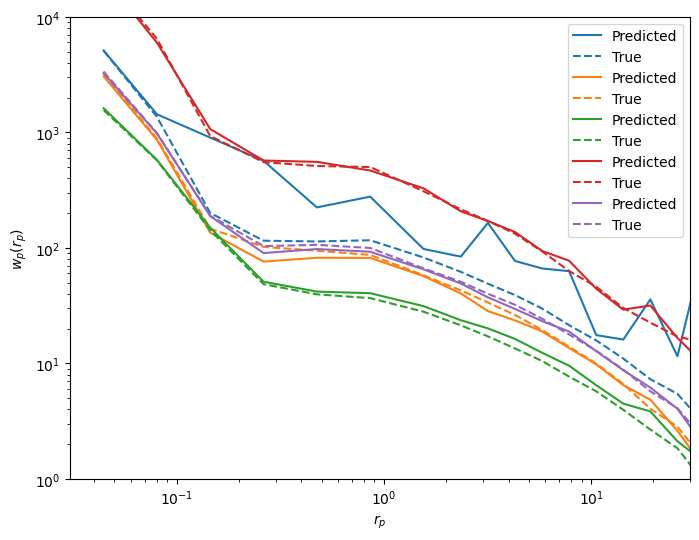

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#ax.plot(proj.rp, Y[0,:], label='True')
mean_pred,_ = sf.predict(sf.X)
ind = np.random.randint(0, mean_pred.shape[0], 5)
for c, i in enumerate(ind):
    #ax.plot(proj.rp, Y[i,:], label='True')
    ax.plot(proj.rp, 10**mean_pred[i], label='Predicted', color=f'C{c}') 
    ax.plot(proj.rp, 10**Y[i,:], label='True', ls='--', color=f'C{c}')
ax.set_xscale('log')
ax.set_xlim(0, 30)
ax.set_ylim(1, 1e4)
ax.set_yscale('log')
ax.set_ylabel(r'$w_p(r_p)$')
ax.set_xlabel(r'$r_p$')
ax.legend()